In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 
from sklearn.manifold import TSNE
from sklearn.utils import shuffle

In [ ]:
! wget "https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/a%20part%20of%20training%20and%20testing%20set/UNSW_NB15_training-set.csv"
!wget "https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/a%20part%20of%20training%20and%20testing%20set/UNSW_NB15_testing-set.csv"

--2020-10-08 07:03:29--  https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/a%20part%20of%20training%20and%20testing%20set/UNSW_NB15_training-set.csv
Resolving www.unsw.adfa.edu.au (www.unsw.adfa.edu.au)... 202.58.60.197
Connecting to www.unsw.adfa.edu.au (www.unsw.adfa.edu.au)|202.58.60.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32293018 (31M) [text/csv]
Saving to: ‘UNSW_NB15_training-set.csv.2’

UNSW_NB15_training- 100%[===================>]  30.80M   392KB/s    in 1m 47s  

2020-10-08 07:05:16 (296 KB/s) - ‘UNSW_NB15_training-set.csv.2’ saved [32293018/32293018]

--2020-10-08 07:05:16--  https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/a%20part%20of%20training%20and%20testing%20set/UNSW_NB15_testing-set.csv
Resolving www.unsw.adfa.edu.au (www.unsw.adfa.edu.au)... 202.58.60.197
Connecting to www.unsw.adfa.edu.au (www.unsw.adfa.edu.au)|202.58.60.197|:443... connected.
HTTP request sent, 

In [ ]:
trainSet = pd.read_csv('UNSW_NB15_training-set.csv')
testSet = pd.read_csv('UNSW_NB15_testing-set.csv')
print(trainSet)
print(testSet)

            id       dur proto  ... is_sm_ips_ports attack_cat  label
0            1  0.121478   tcp  ...               0     Normal      0
1            2  0.649902   tcp  ...               0     Normal      0
2            3  1.623129   tcp  ...               0     Normal      0
3            4  1.681642   tcp  ...               0     Normal      0
4            5  0.449454   tcp  ...               0     Normal      0
...        ...       ...   ...  ...             ...        ...    ...
175336  175337  0.000009   udp  ...               0    Generic      1
175337  175338  0.505762   tcp  ...               0  Shellcode      1
175338  175339  0.000009   udp  ...               0    Generic      1
175339  175340  0.000009   udp  ...               0    Generic      1
175340  175341  0.000009   udp  ...               0    Generic      1

[175341 rows x 45 columns]
          id       dur proto  ... is_sm_ips_ports attack_cat  label
0          1  0.000011   udp  ...               0     Normal    

In [ ]:
trainSet_X = trainSet[["dur", "spkts", "sttl", "ct_dst_sport_ltm", "rate", "ct_state_ttl", "ct_srv_dst", "ct_srv_src", "ct_dst_src_ltm", "ct_src_ltm", "service", "proto", "ct_dst_ltm"]]
trainSet_X = pd.get_dummies(trainSet_X, columns=["proto", "service"])
trainSet_Y = trainSet["label"]
print(trainSet_X.dtypes)
print(trainSet_X.info())
trainSet_X = trainSet_X.dropna()
print(trainSet_X.info())

dur                 float64
spkts                 int64
sttl                  int64
ct_dst_sport_ltm      int64
rate                float64
                     ...   
service_radius        uint8
service_smtp          uint8
service_snmp          uint8
service_ssh           uint8
service_ssl           uint8
Length: 157, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Columns: 157 entries, dur to service_ssl
dtypes: float64(2), int64(9), uint8(146)
memory usage: 39.1 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 175341 entries, 0 to 175340
Columns: 157 entries, dur to service_ssl
dtypes: float64(2), int64(9), uint8(146)
memory usage: 40.5 MB
None


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 , f_classif , mutual_info_regression
X = trainSet[["dur" , "sbytes", "dbytes", "sttl", "dttl", "sloss", "dloss",  "sload", "dload", "spkts", "dpkts", "swin", "dwin", "smean", "dmean", "trans_depth", "response_body_len", "sjit", "djit", "sinpkt" , "dinpkt", "tcprtt", "synack", "ackdat", "ct_state_ttl", "ct_flw_http_mthd", "ct_ftp_cmd", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm","ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm"]]
y = trainSet["label"]  
bestfeatures = SelectKBest(score_func = f_classif, k=15)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(["dur" , "sbytes", "dbytes", "sttl", "dttl", "sloss", "dloss",  "sload", "dload", "spkts", "dpkts", "swin", "dwin", "smean", "dmean", "trans_depth", "response_body_len", "sjit", "djit", "sinpkt" , "dinpkt", "tcprtt", "synack", "ackdat", "ct_state_ttl", "ct_flw_http_mthd", "ct_ftp_cmd", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm","ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm"])
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print("SelectKBest top 15 features - ")
print(featureScores.nlargest(15,'Score')) 


SelectKBest top 15 features - 
               Specs          Score
3               sttl  161780.526952
24      ct_state_ttl   87830.779493
8              dload   32170.312851
32  ct_dst_sport_ltm   25645.955324
14             dmean   23195.039749
11              swin   21961.796620
12              dwin   19950.909669
31  ct_src_dport_ltm   18059.210546
33    ct_dst_src_ltm   17835.399757
30        ct_src_ltm   10549.386809
29        ct_dst_ltm    9783.377995
27        ct_srv_src    9707.760648
28        ct_srv_dst    9618.746066
7              sload    6066.435816
19            sinpkt    5612.172675


ExtraTreesClassifier top 15 features - 


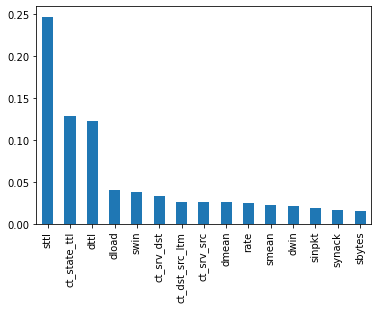

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
print("ExtraTreesClassifier top 15 features - ")
X = trainSet.iloc[:,5:43]
y = trainSet["label"]  
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='bar')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTENC
trainSet['label'] = pd.to_numeric(trainSet['label'])
trainSet = shuffle(trainSet)
X_train , Y_train = trainSet[trainSet.columns[:-2]] , trainSet[['label']]
print("Before OverSampling, counts of label '1': " , sum(Y_train['label'] == 1))
print("Before OverSampling, counts of label '0': " , sum(Y_train['label'] == 0)) 
X , y = pd.DataFrame(X_train).to_numpy(), pd.DataFrame(Y_train).to_numpy().ravel()
sm = SMOTENC(categorical_features=[0,1,2,3,4],sampling_strategy=0.5) 
X_train_res, y_train_res = sm.fit_resample(X, y) 
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': " , sum(y_train_res == 1))
print("After OverSampling, counts of label '0': " , sum(y_train_res == 0))

Before OverSampling, counts of label '1':  119341
Before OverSampling, counts of label '0':  56000
After OverSampling, the shape of train_X: (179011, 43)
After OverSampling, the shape of train_y: (179011,) 

After OverSampling, counts of label '1':  119341
After OverSampling, counts of label '0':  59670


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

under = RandomUnderSampler(random_state = 2,sampling_strategy=0.6667) 
X_train_under, y_train_under = under.fit_sample(X_train_res, y_train_res.ravel()) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_under.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_under.shape)) 
  
print("After Undersampling, counts of label '1': " , sum(y_train_under == 1))
print("After Undersampling, counts of label '0': " , sum(y_train_under == 0))


After Undersampling, the shape of train_X: (149170, 43)
After Undersampling, the shape of train_y: (149170,) 

After Undersampling, counts of label '1':  89500
After Undersampling, counts of label '0':  59670


In [ ]:
np.random.seed(30)
np.random.shuffle(X_train_under)
np.random.shuffle(y_train_under)
print("After Undersampling, counts of label '1': " , sum(y_train_under[:1000] == 1))

After Undersampling, counts of label '1':  575


In [ ]:
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
X1 = trainSet[(trainSet.label==1)]
X1 = X1.iloc[:2500,5:43]
print(X1)
X2 = trainSet[(trainSet.label==0)]
X2 = X2.iloc[:2500,5:43]
print(X2)
X = pd.concat([X1,X2])
X = StandardScaler().fit_transform(X)
X_new = TSNE(n_components=3).fit_transform(X[:5000])
print(X_new.shape)

       spkts  dpkts  sbytes  ...  ct_src_ltm  ct_srv_dst  is_sm_ips_ports
47911      2      0     200  ...           2           4                0
47912      2      0     200  ...           2           7                0
47913      2      0     200  ...           1           6                0
47914      2      0     200  ...           2           6                0
47915      2      0     200  ...          11           4                0
...      ...    ...     ...  ...         ...         ...              ...
50406      2      0     200  ...           2           6                0
50407      2      0     200  ...           1           7                0
50408      2      0     200  ...           2           6                0
50409      2      0     200  ...           1           7                0
50410      2      0     168  ...           1           1                0

[2500 rows x 38 columns]
      spkts  dpkts  sbytes  ...  ct_src_ltm  ct_srv_dst  is_sm_ips_ports
0         6  

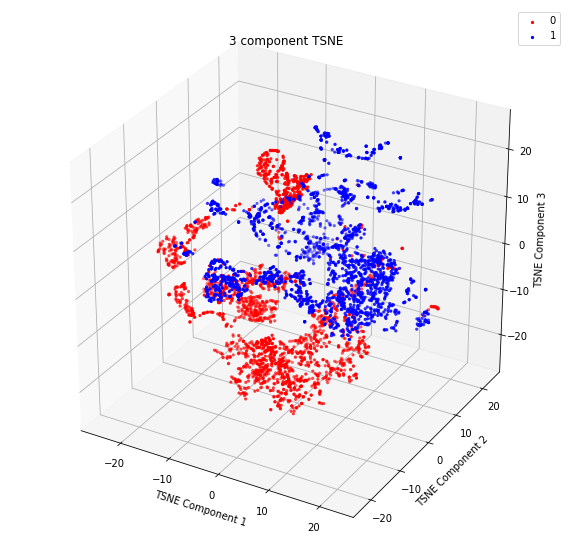

In [ ]:
finalDf = pd.DataFrame(data = X_new , columns = ['TSNE component 1', 'TSNE component 2' , 'TSNE component 3'])
labelDf = pd.DataFrame(data = [1]*2500 + [0]*2500 , columns = ['label'])
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('TSNE Component 1')
ax.set_ylabel('TSNE Component 2')
ax.set_zlabel('TSNE Component 3')
ax.set_title('3 component TSNE')
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = labelDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'TSNE component 1']
               , finalDf.loc[indicesToKeep, 'TSNE component 2']
               , finalDf.loc[indicesToKeep, 'TSNE component 3']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

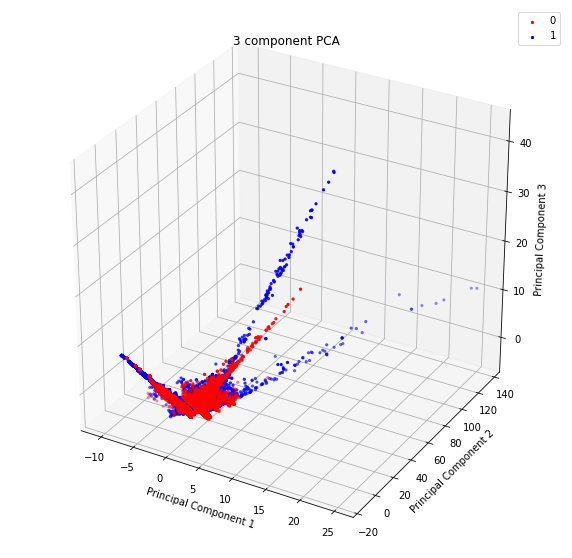

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

trainSet = pd.read_csv('UNSW_NB15_training-set.csv')
pca = PCA(n_components = 3, svd_solver='full')
X = trainSet[["dur" , "sbytes", "dbytes", "sttl", "dttl", "sloss", "dloss",  "sload", "dload", "spkts", "dpkts", "swin", "dwin", "smean", "dmean", "trans_depth", "response_body_len", "sjit", "djit", "sinpkt" , "dinpkt", "tcprtt", "synack", "ackdat", "ct_state_ttl", "ct_flw_http_mthd", "ct_ftp_cmd", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm","ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm"]]
X = StandardScaler().fit_transform(X)
X_new = pca.fit_transform(X)
temp = (pca.explained_variance_ratio_)

principalDf = pd.DataFrame(data = X_new , columns = ['principal component 1', 'principal component 2' , 'principal component 3'])
finalDf = pd.concat([principalDf, trainSet[['label']]], axis = 1)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3 component PCA')

targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()


No handles with labels found to put in legend.


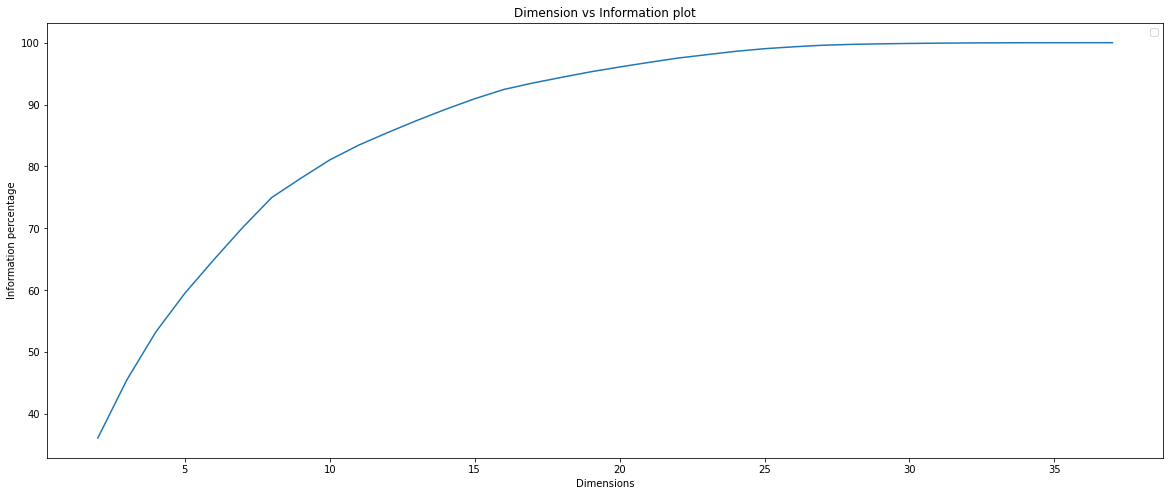

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#Add the complete training dataset in the original order
trainSet = pd.read_csv('UNSW_NB15_training-set.csv')
X = trainSet[trainSet.columns[5:43]]
X = StandardScaler().fit_transform(X)
xdata = []
ydata = np.linspace(2,37,36)
for tre in range(2,38):
  pca = PCA(n_components = tre, svd_solver='full')
  X_new = pca.fit_transform(X)
  temp = (pca.explained_variance_ratio_)
  total = 0 
  for i in temp:
    total+=i
  xdata.append(total*100)
plt.figure(figsize=(20,8))
plt.plot(ydata,xdata)
plt.legend(loc="upper right")
plt.xlabel("Dimensions")
plt.ylabel("Information percentage")
plt.title("Dimension vs Information plot")
plt.show()

In [ ]:
testSet_X = testSet[["dur", "spkts", "sttl", "ct_dst_sport_ltm", "rate", "ct_state_ttl", "ct_srv_dst", "ct_srv_src", "ct_dst_src_ltm", "ct_src_ltm", "service", "proto", "ct_dst_ltm"]]
testSet_X = pd.get_dummies(testSet_X, columns=["proto", "service"])
testSet_Y = testSet["label"]

In [ ]:
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
#Feature Selection  -  Low Variance 

from sklearn.feature_selection import VarianceThreshold
X = trainSet_X
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
print(sel.fit_transform(X))

In [ ]:
#Feature Selection -  Univariate feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = trainSet_X , trainSet_Y
X.shape
X_new = SelectKBest(chi2, k=10).fit_transform(X, y)
X_new.shape

In [ ]:
#Feature Selection -  L1 feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
X, y = trainSet[["dur" , "sbytes", "dbytes", "sttl", "dttl", "sloss", "dloss",  "sload", "dload", "spkts", "dpkts", "swin", "dwin", "smean", "dmean", "trans_depth", "response_body_len", "sjit", "djit", "sinpkt" , "dinpkt", "tcprtt", "synack", "ackdat", "ct_state_ttl", "ct_flw_http_mthd", "ct_ftp_cmd", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm","ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm"]] , trainSet[trainSet.columns[-2]]
lsvc = LinearSVC(C=1, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True,max_features=15)
li = (model.get_support(indices=True))

In [ ]:
temp = ["dur" , "sbytes", "dbytes", "sttl", "dttl", "sloss", "dloss",  "sload", "dload", "spkts", "dpkts", "swin", "dwin", "smean", "dmean", "trans_depth", "response_body_len", "sjit", "djit", "sinpkt" , "dinpkt", "tcprtt", "synack", "ackdat", "ct_state_ttl", "ct_flw_http_mthd", "ct_ftp_cmd", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm","ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm"]
print("L1 based top 15 feature selection - ")
asd = []
for i in li:
  asd.append(temp[i])

L1 based top 15 feature selection - 


In [ ]:
X, y = trainSet[asd] , trainSet[trainSet.columns[-1]]
lsvc = LinearSVC(C=1, penalty="l1", dual=False)
lsvc.fit(X, y)

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X_test, y_test = testSet[asd] , testSet[trainSet.columns[-1]]
y_pred  = lsvc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7212141087305057
[[18105 18895]
 [ 4058 41274]]
              precision    recall  f1-score   support

           0       0.82      0.49      0.61     37000
           1       0.69      0.91      0.78     45332

    accuracy                           0.72     82332
   macro avg       0.75      0.70      0.70     82332
weighted avg       0.74      0.72      0.71     82332



In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y=True)
print(X)

In [ ]:
#Feature Selection -  Tree based feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X, y = trainSet_X , trainSet_Y
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape) 

In [ ]:
#Import svm model
'''from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', verbose=10) # Linear Kernel

#Train the model using the training sets
clf.fit(trainSet_X, trainSet_Y)
print("Done Training")
#Predict the response for test dataset
y_pred = clf.predict(testSet_X)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(testSet_Y,y_pred))
print(classification_report(testSet_Y,y_pred))'''